In [1]:
import numpy as np
%load_ext autoreload
%autoreload 2

# SISSA - Language Reading and The Brain - a.y. 2023-24
# Sebastiano Quintavalle - Assignment 2

In [2]:
from os import path
from matplotlib import pyplot as plt
from statistics import median

import words
from settings import DRC_DIR, BINARY, DEFAULT_PARAMETER_PATH
from pyDRC import DRCNetwork, Parameter, ResultSet
from io_ import words_to_txt_file, read_txt_file, print_list

In [3]:
Parameter.DEFAULT_PARAMETER_PATH.set_default_parameter_path(new_path=DEFAULT_PARAMETER_PATH)

drc = DRCNetwork(
    dir_=DRC_DIR,
    binary=BINARY
)
drc.clear()

drc

Removed directory: C:\Users\user.LAPTOP-G27BJ7JO\Documents\GitHub\LRB_project\assignment2\drc\irregular.drc
Removed directory: C:\Users\user.LAPTOP-G27BJ7JO\Documents\GitHub\LRB_project\assignment2\drc\nonwordNonePseudohomophone.drc
Removed directory: C:\Users\user.LAPTOP-G27BJ7JO\Documents\GitHub\LRB_project\assignment2\drc\nonwordPseudohomophone.drc
Removed directory: C:\Users\user.LAPTOP-G27BJ7JO\Documents\GitHub\LRB_project\assignment2\drc\regular.drc


DRCNetwork[C:\Users\user.LAPTOP-G27BJ7JO\Documents\GitHub\LRB_project\assignment2\drc\drc]

## Exercise 1

### Instructions

The regularity effect consists in the fact that words with a regular spelling (e.g., *wick*) gets named more quickly than words with an irregular spelling (e.g., *wand*; McCann and Besner, 1987; Rastle and Coltheart, 1999). Explain how the DRC offers an account for this effect, and verifies it by simulating the reading of a bunch of regular words (`regular.txt`) and a comparable set of irregular words (`irregular.txt`). Illustrate which activations in the DRC dynamics confirms your verbal account. Now try to make the regularity effect bigger, or smaller – how would you do that? Illustrate with simulations.

### DRC for regular and irregular word


The DRC model, which stands for Dual Route Cascading, is a computational model for reading aloud. It comprises two routes:

1. The first route is the lexical route, which operates with the word as a whole. It utilizes a storage of known words acting as a lookup table, mapping each word to its pronunciation.
2. The second route is the non-lexical route, known as the GPC route. This route is typically slower; it decodes words letter by letter and applies a set of phonetic rules to convert graphemes to phonemes and construct the pronunciation.

Regular words are generally expected to be read faster because their regularity allows for an immediate application of grapheme-phoneme rules. When the second route is activated, the two routes tend to agree, and any conflicts are easily resolved. This does not occur for irregular words that can only rely on the stored pronunciation in the lexical route and face conflicts when resolving discrepancies with the GPC route, leading to longer processing times.

The concept of reading "fast" and "slow" is translatable in the model as the number of cycles the model takes to resolve conflicts arising from the two routes: the more cycles required, the more time it takes, indicating that the word is more difficult to read.

### Reading words

Let's start by examining the two groups of words.

In [4]:
regular_words, regular_file = words.regular

print_list(l=regular_words, title="Regular words")

Regular words
- buds
- canes
- coil
- curl
- grade
- lump
- lode
- pops
- rump
- sock
- sage
- suck
- sobs
- wade
- weed
- wick
- weld
- wilt
- woke
- wink
Tot: 20


In [5]:
words_to_txt_file(words=regular_words, file_path=path.join(DRC_DIR, regular_file))

Content successfully written to C:\Users\user.LAPTOP-G27BJ7JO\Documents\GitHub\LRB_project\assignment2\drc\regular.txt


In [6]:
irregular_words, irregular_file = words.irregular

print_list(l=irregular_words, title="Irregular words")

Irregular words
- bury
- caste
- comb
- grow
- glove
- lure
- lute
- pour
- ruse
- sew
- sans
- sues
- sown
- wand
- warn
- warp
- wasp
- wily
- wool
- worm
Tot: 20


In [7]:
words_to_txt_file(words=irregular_words, file_path=path.join(DRC_DIR, irregular_file))

Content successfully written to C:\Users\user.LAPTOP-G27BJ7JO\Documents\GitHub\LRB_project\assignment2\drc\irregular.txt


The two sets are similar. Each set consists of 20 words, predominantly comprising 4 characters, with a few containing 5 characters.

### Running DRC

We run the default DRC model on the two sets of words, storing their activations for further analysis.

In [8]:
regular_results, regular_activations = drc.run(
    word=regular_file,
    store_activations=True
)

Running: ./drc -a -b regular.txt


In [9]:
irregular_results, irregular_activations = drc.run(
    word=irregular_file,
    store_activations=True
)

Running: ./drc -a -b irregular.txt


### Cycles

We will compare the number of cycles for the two types of words. Please note that the x-axis in the scatterplot is arbitrary as it corresponds to the order in the collection, which is invariant to permutations.

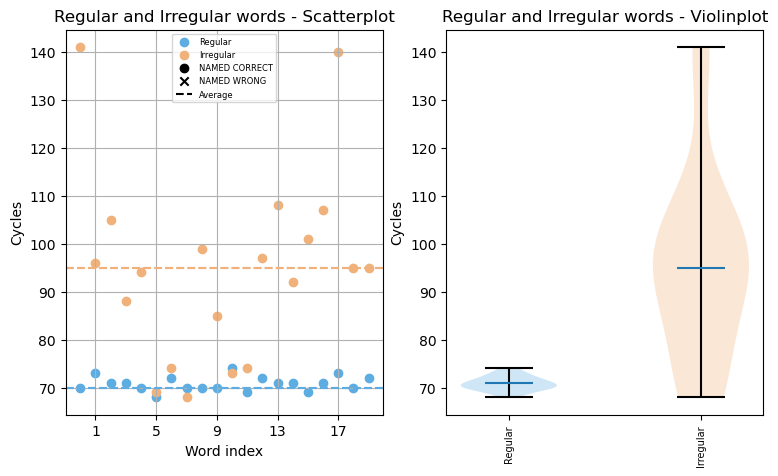

In [10]:
ResultSet.plot_cycles_comparison(
    results=[regular_results, irregular_results],
    legends=["Regular", "Irregular"],
    title="Regular and Irregular words",
    figsize=(9, 5)
)

The regular words demonstrate a high degree of similarity in terms of cycles, with a tightly contained variance, each aligning closely with the average of 70 cycles. In contrast, the irregular words exhibit a more dispersed distribution, averaging around 95 cycles. However, there are four irregular words read as quickly as regular ones, and other two irregular words particularly challenging to read, justifying spread in the violin plot. Overall, the plots suggest a generally greater difficulty in reading irregular words compared to their regular counterparts, with a notable increase in variability.

Let's examine the easy-to-read and very-hard-to-read irregular words.

In [11]:
[result.word for result in irregular_results if result.cycles < 80]

['lure', 'lute', 'pour', 'sans', 'sues']

In [12]:
[result.word for result in irregular_results if result.cycles > 130]

['bury', 'wily']

### Activations

We create a plot illustrating the distinct activations of each word in the two sets.

#### Regular activations.

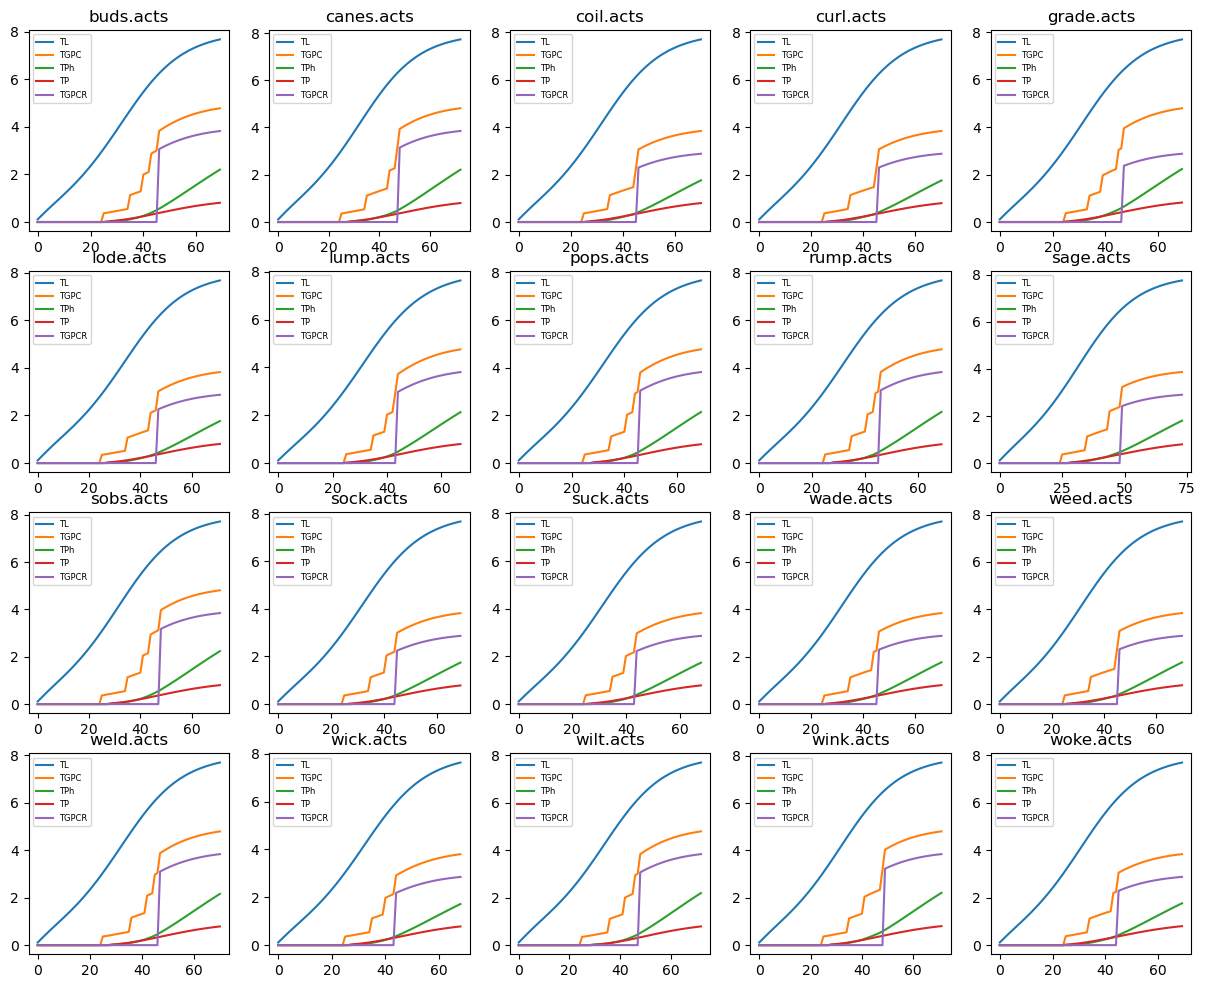

In [13]:
regular_activations.plot_multiple(nrows=4)

#### Irregular activations

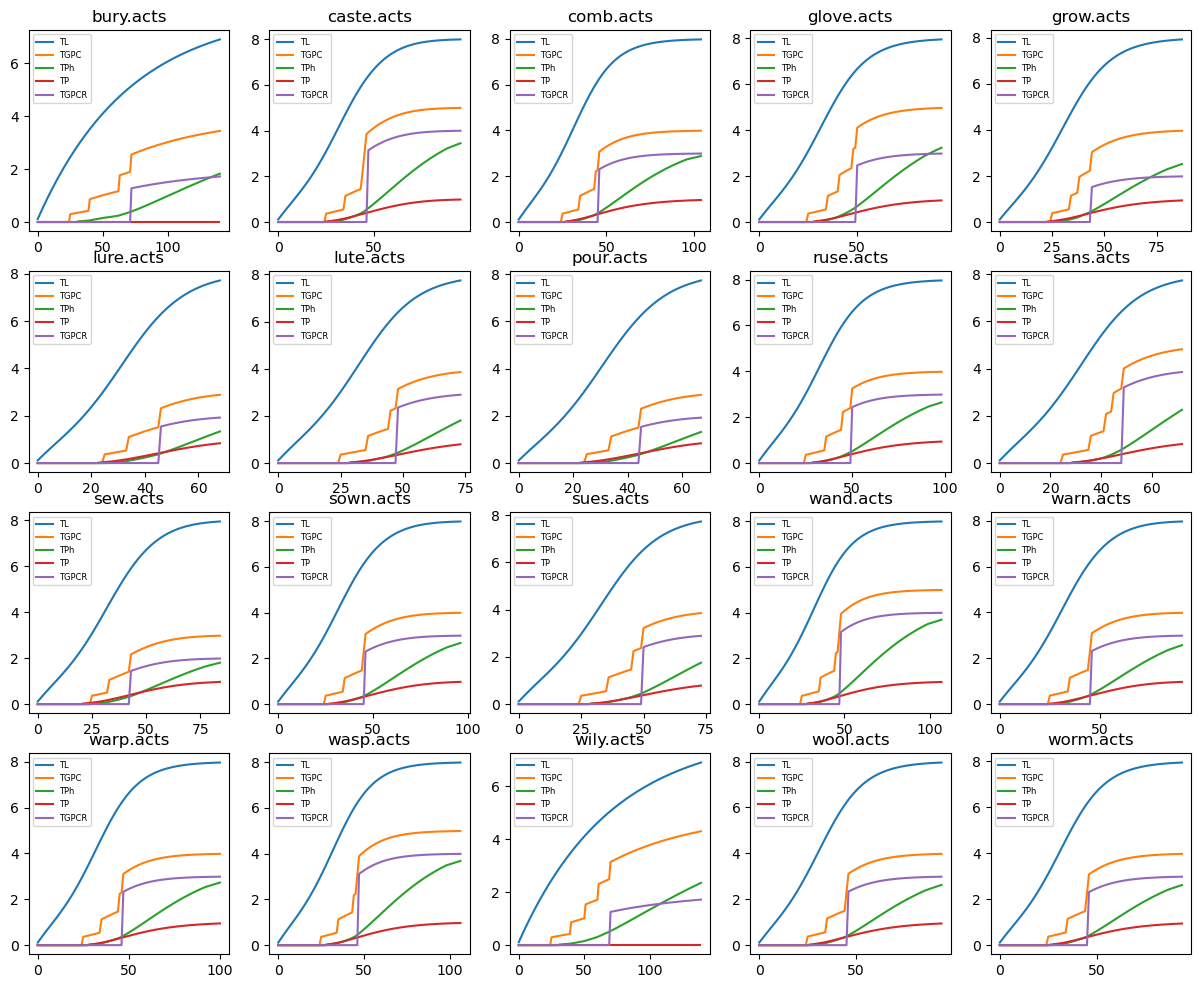

In [14]:
irregular_activations.plot_multiple(nrows=4)

The activations display similar variability patterns observed in the number of cycles required, with activations for regular words notably similar and some variations existing among the irregular ones. To highlight the difference between activations, let's focus on one example from each set, selecting the words closest to the average behavior in terms of cycles.

In [15]:
def get_avg_cycle_word(results):
    return next(iter([
        result for result in results
        if result.cycles == median(r.cycles for r in results)
    ]))

In [16]:
avg_regular   = get_avg_cycle_word(results=regular_results)
avg_irregular = get_avg_cycle_word(results=irregular_results)

print(f"Avg regular:   {avg_regular.word} (Cycles: {avg_regular.cycles})")
print(f"Avg irregular: {avg_irregular.word} (Cycles: {avg_irregular.cycles})")

Avg regular:   coil (Cycles: 71)
Avg irregular: wool (Cycles: 95)


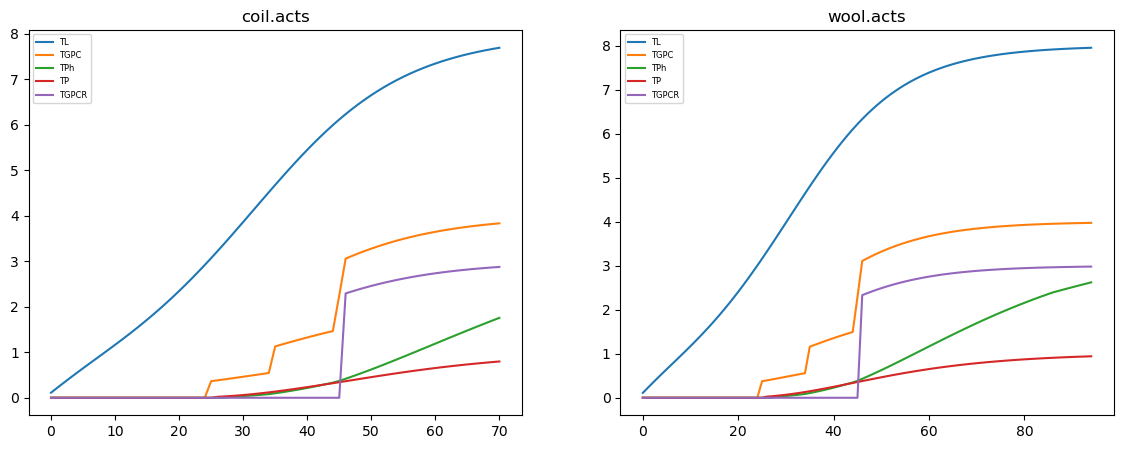

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

regular_activations.  plot(file_name=f"{avg_regular.word}.acts",   ax=axes[0])
irregular_activations.plot(file_name=f"{avg_irregular.word}.acts", ax=axes[1])

The main difference between the two activations is primarily in the `TPh` activation, which increases in the irregular one during the last cycles (the ones it takes more time than the regular one). This aligns with the hypothesis that irregular words take more time to resolve conflicts between the two routes, as the GPC typically doesn't align with the lexical route. The extra cycles are required for the model to understand which of the two routes to prioritize, typically favoring the stored pronunciation in the lexicon in the case of irregular words.

### Model parameters

The earlier findings suggest that the interaction between the graphemes and their pronunciation is fundamental in the behavior of the two types of words. Now, let's examine the parameter of the model involved in this operation (along with its default value).

We will initially explore the behavior of the two example words by varying the `OrthlexLetterExcitation` parameter.

In [18]:
print(f"{Parameter.OrthlexLetterExcitation} default: {Parameter.OrthlexLetterExcitation.default}")

OrthlexLetterExcitation default: 0.3


The **regular** word.

Running: ./drc --nofiles -S OrthlexLetterExcitation 0.1 0.9 10 coil


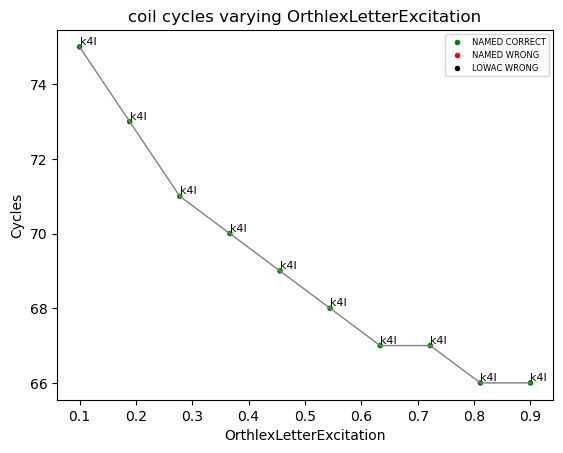

In [19]:
drc.run(
    word=avg_regular.word,
    parameters=[(Parameter.OrthlexLetterExcitation, (0.10, 0.90, 10))]
).plot_cycles()

The **irregular** word.

Running: ./drc --nofiles -S OrthlexLetterExcitation 0.1 0.9 10 wool


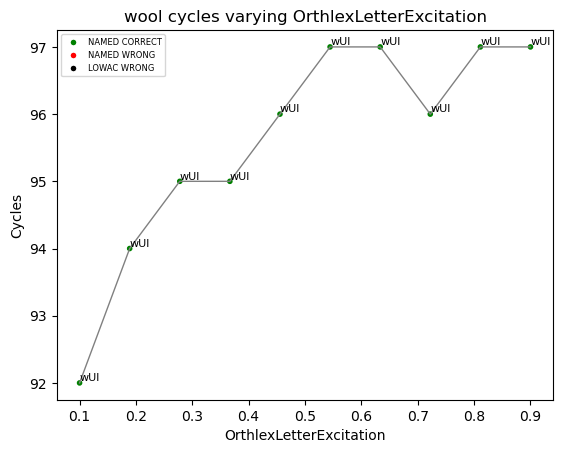

In [20]:
drc.run(
    word=avg_irregular.word,
    parameters=[(Parameter.OrthlexLetterExcitation, (0.10, 0.90, 10))]
).plot_cycles()

The two trends demonstrate the expected behavior, as the excitation increases, the task becomes easier for regular words and harder for irregular ones. This is why we are reinforcing the process the non-lexical route relies more on, which is the individual letter processing. Consequently, we are intensifying the conflict between the two routes, which behaves differently for words where the routes agree (regular) and words where they disagree (irregular).

### Running DRC with new parameters

We try to enhance the regularity by strengthening the previously seen connection setting `OrthlexLetterExcitation` = 0.9 .

In [21]:
parameters_v1 = [
    (Parameter.OrthlexLetterExcitation, 0.9),
]

regular_results_v1  = drc.run(word=regular_file,   parameters=parameters_v1)
irregular_results_v1 = drc.run(word=irregular_file, parameters=parameters_v1)

Running: ./drc --nofiles -P OrthlexLetterExcitation 0.9 -b regular.txt
Running: ./drc --nofiles -P OrthlexLetterExcitation 0.9 -b irregular.txt


Conversely we make these connection weaker to indirectly help the single grapheme conversion setting `OrthlexLetterExcitation` = 0.1 .

In [22]:
parameters_v2 = [
    (Parameter.OrthlexLetterExcitation, 0.1),
]
regular_results_v2  = drc.run(word=regular_file, parameters=parameters_v2)
irregular_results_v2 = drc.run(word=irregular_file, parameters=parameters_v2)

Running: ./drc --nofiles -P OrthlexLetterExcitation 0.1 -b regular.txt
Running: ./drc --nofiles -P OrthlexLetterExcitation 0.1 -b irregular.txt


We plot the cycles in the three cases for a visual comparison.

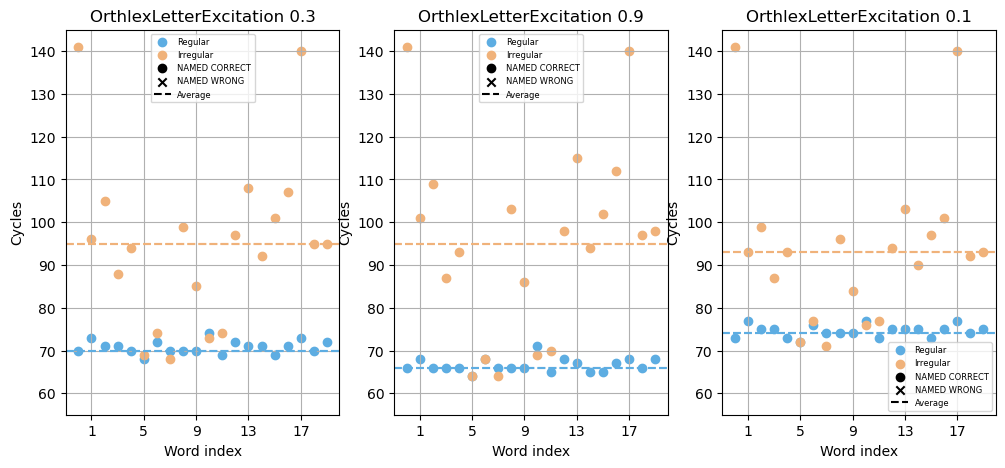

In [23]:
_, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

results = [
    (regular_results,     irregular_results),
    (regular_results_v1,  irregular_results_v1),
    (regular_results_v2,  irregular_results_v2)
]

for i, (result, title) in enumerate(zip(results, ["OrthlexLetterExcitation 0.3", "OrthlexLetterExcitation 0.9", "OrthlexLetterExcitation 0.1"])):
    
    regular, irregular = result
    
    ResultSet.plot_cycles_scatterplot(
        results=[regular, irregular],
        legends=["Regular", "Irregular"],
        title=title,
        yrange=(55, 145),
        ax=axes[i]
    )

The scatterplots highlight the trends illustrated by the two words we examined before.
 
Increasing the activation makes regular words faster to read, while irregular words seem to maintain a similar average level. However, an increase in time for irregular words is partially obscured by a group of 5 words that behave like regular ones, suggesting that they should be re-evaluated if they are part of the irregular set.

On the other hand, making the second route ineffective makes irregular words slightly faster, as they can more easily resolve the conflict by giving importance only to the lexicon. Moreover, this change decreases the speed of regular words, as the same information is now conveyed only by the lexical route and not both.

## Exercise 2

### Instructions

The pseudo-homophone effect consists in the fact that nonwords that are homophonic to real words (e.g., *brane*, *brees*) are read faster than otherwise comparable control nonwords (e.g., *clafe*, *kraaf*; e.g., McCann and Besner, 1987; Taft and Russell, 1992). Try and see whether the DRC is able to simulate the effect (use `nonwordPseudohomophone.txt` `andnonwordNonPseudohomophones.txt`). Why does this effect arise? Illustrate with reference to the activation dynamics.

### DRC for Pseudo-homophone words and not

The first route of the model, which processes the word as a whole entity, is expected to read pseudo-homophone words faster. This expectation arises from the fact that pseudo-homophone words resemble the words stored in the vocabulary, thus making them easier to recognize and process quickly within the lexical route. On the other hand, non-pseudo-homophonic words are less likely to have direct matches in the stored vocabulary and are therefore more likely to engage the grapheme-to-phoneme conversion (GPC) route. The GPC route typically requires more time for processing as it involves decoding the word letter by letter and applying phonetic rules, which can be more time-consuming compared to the direct recognition facilitated by the lexical route.

### Reading words

We read the words used in the experiment.

In [24]:
ph_words, ph_file = words.non_words_pseudohomophone

print_list(l=ph_words, title="Pseuodohomophone")

Pseuodohomophone
- brane
- milc
- gole
- gaim
- whele
- poast
- moov
- rayne
- traid
- tode
- rume
- maik
- hed
- groope
- keap
- stawk
- blak
- hoam
- blud
- fite
- blo
- treet
- hye
- cawl
- shaip
- larst
- lej
- berd
- cair
- croo
Tot: 30


In [25]:
words_to_txt_file(words=ph_words, file_path=path.join(DRC_DIR, ph_file))

Content successfully written to C:\Users\user.LAPTOP-G27BJ7JO\Documents\GitHub\LRB_project\assignment2\drc\nonwordPseudohomophone.txt


In [26]:
nph_words, nph_file = words.non_words_non_pseudohomophone

print_list(l=nph_words, title="Non Pseuodohomophone")

Non Pseuodohomophone
- prane
- filc
- jole
- raim
- chele
- woast
- troov
- hayne
- chaid
- fode
- yume
- paik
- gled
- noope
- meap
- rawk
- plak
- voam
- slud
- pite
- clo
- smeet
- kye
- dawl
- laip
- darst
- bej
- lerd
- sair
- snoo
Tot: 30


In [27]:
words_to_txt_file(words=nph_words, file_path=path.join(DRC_DIR, nph_file))

Content successfully written to C:\Users\user.LAPTOP-G27BJ7JO\Documents\GitHub\LRB_project\assignment2\drc\nonwordNonePseudohomophone.txt


### Running DRC

We run the default version of DRC network on the two types of words, storing their activations.

In [28]:
ph_results, ph_activations = drc.run(
    word=ph_file,
    store_activations=True
)

Running: ./drc -a -b nonwordPseudohomophone.txt


In [29]:
nph_results, nph_activations = drc.run(
    word=nph_file,
    store_activations=True
)

Running: ./drc -a -b nonwordNonePseudohomophone.txt


### Cycles

Let's examine and compare the number of cycles for each of the two families of words.

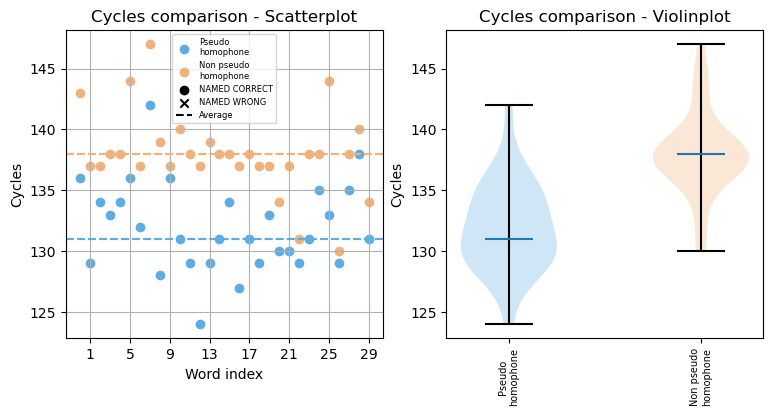

In [30]:
ResultSet.plot_cycles_comparison(
    results=[ph_results,nph_results],
    legends=["Pseudo\nhomophone","Non pseudo\nhomophone"]
)

There is evidence supporting the idea that pseudo-homophone words are generally easier to read, leveraging the benefits of the lexical route. The center of mass of the two distributions is at 132 cycles for pseudo-homophones and 138 cycles for non-pseudo-homophones. The density curve of pseudo-homophones is quite broad, while that of non-pseudo-homophones appears more Normal. 

There are a few exceptions in the points: two non-pseudo-homophone words are easier to read than the average for pseudo-homophones, and conversely, one pseudo-homophone word is more challenging than the average for non-pseudo-homophones. Let's examine the words generating these exceptions.

In [31]:
[r.word for r in ph_results if r.cycles > 138]

['rayne']

In [32]:
[r.word for r in nph_results if r.cycles < 132]

['kye', 'bej']

### Activations

We create a plot illustrating the distinct activations of each word in the two sets.

#### Pseudo-homophone

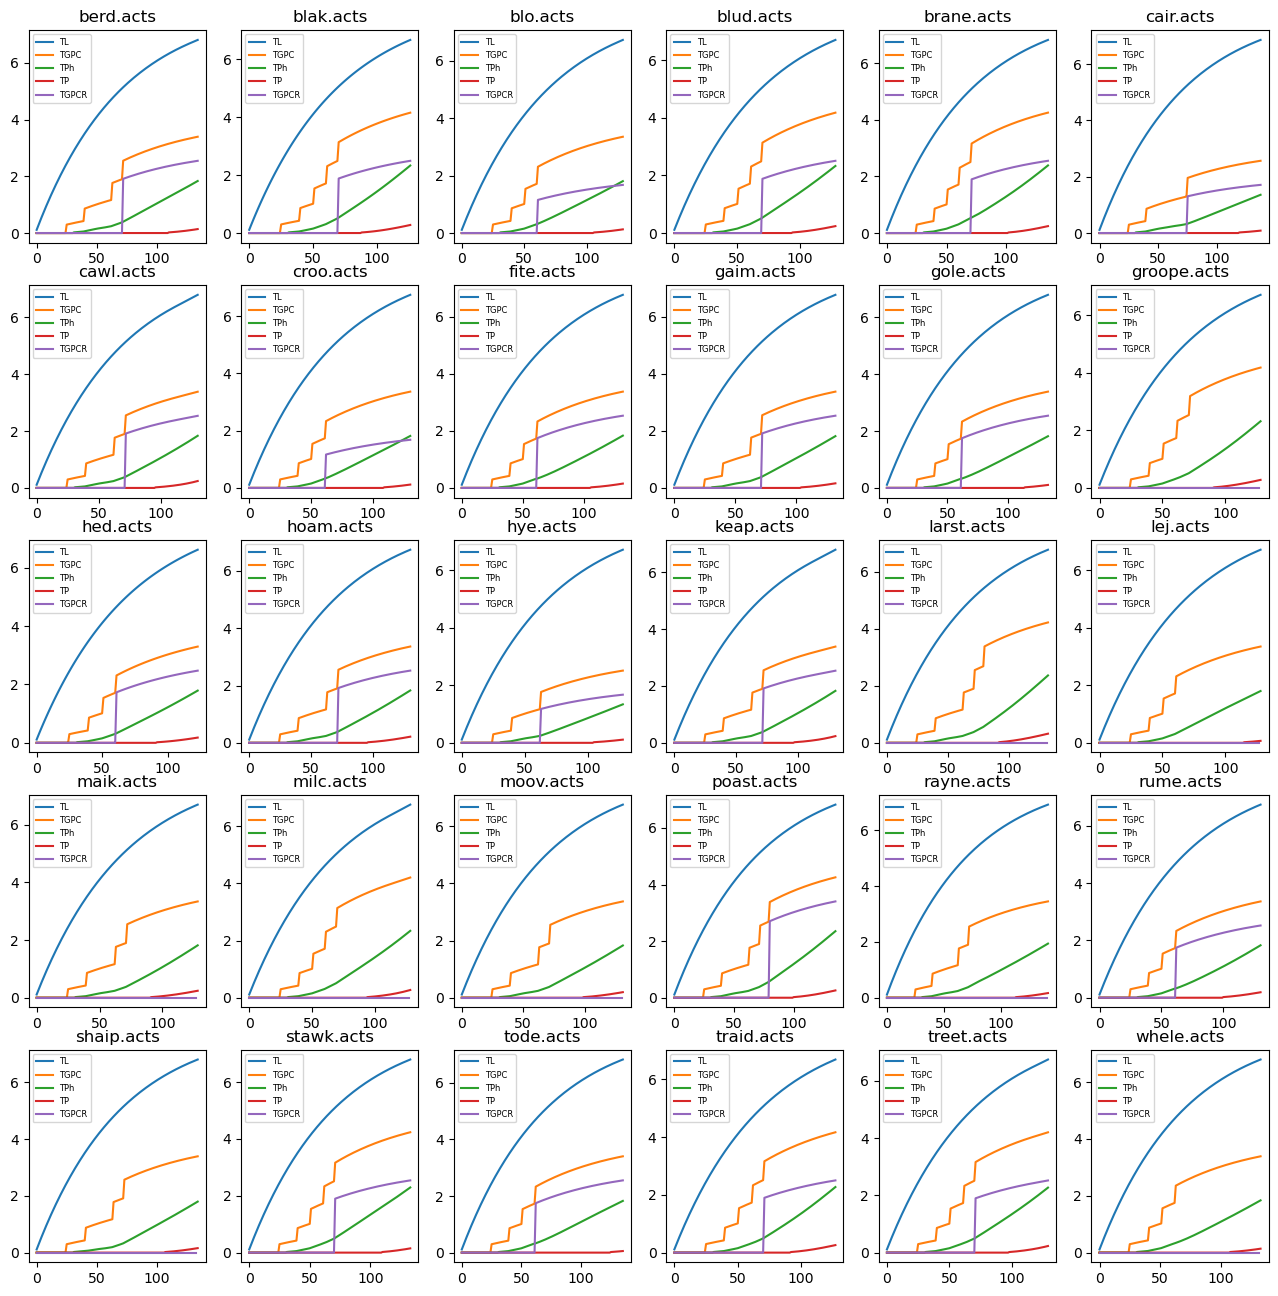

In [33]:
ph_activations.plot_multiple(nrows=5, figsize=(16, 16))

#### Non pseudo-homophone

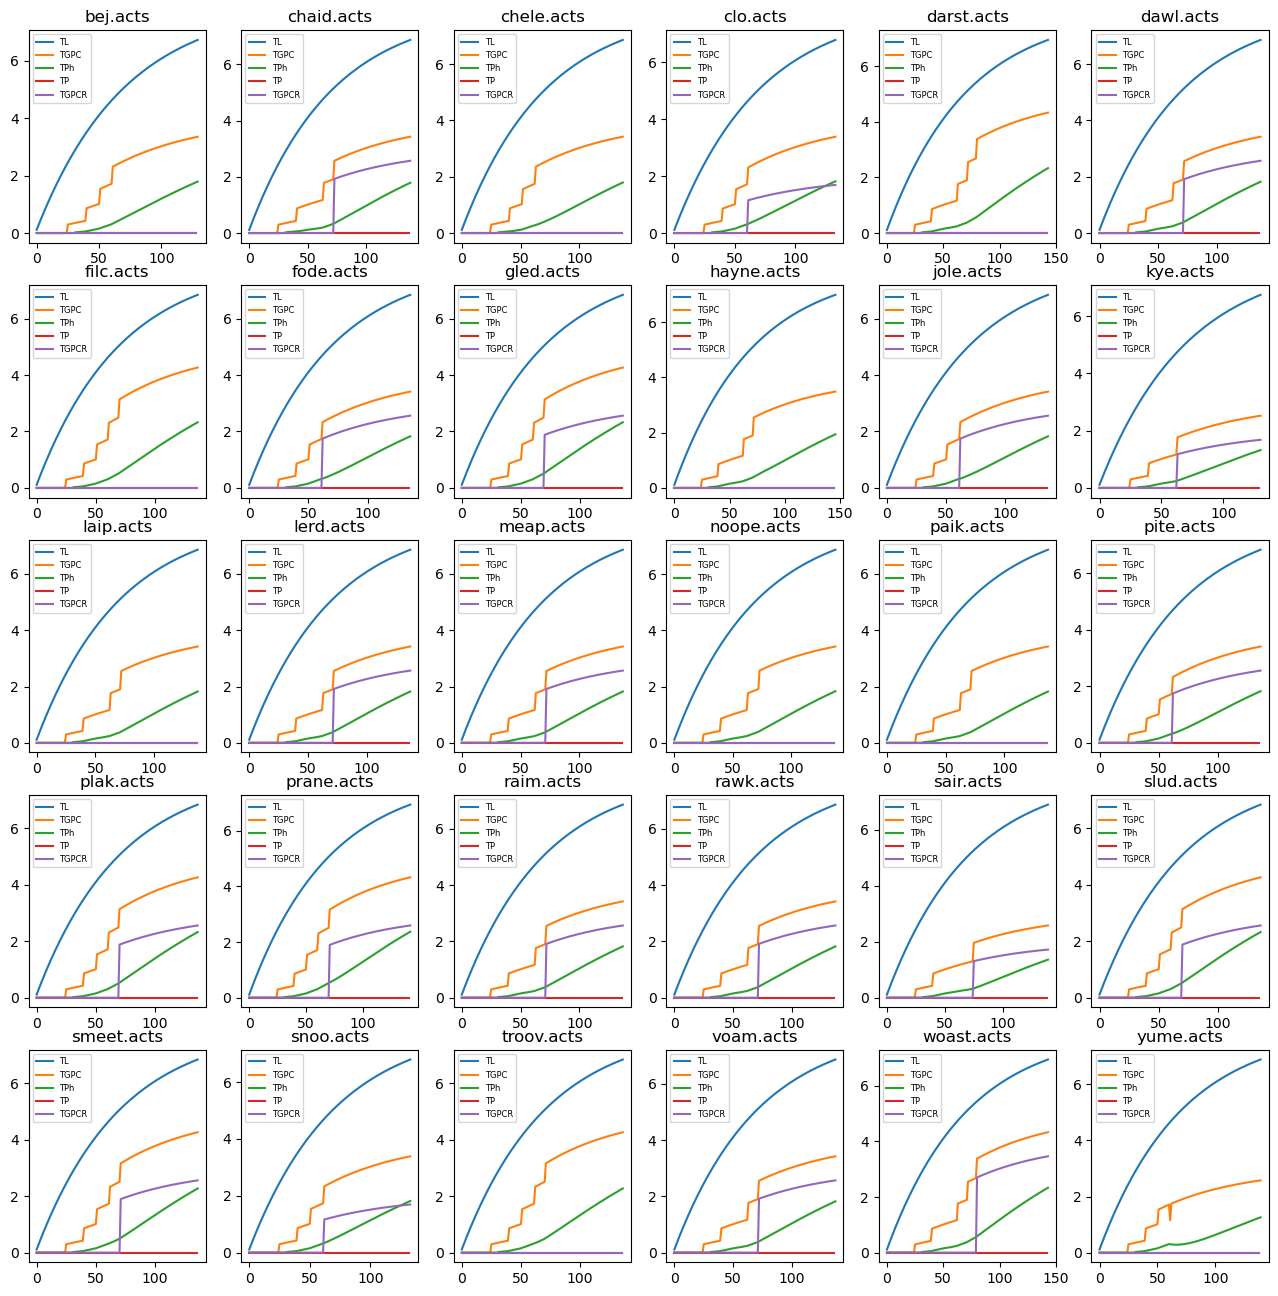

In [34]:
nph_activations.plot_multiple(nrows=5, figsize=(16, 16))

There are distinct patterns within both sets: first, the `TGPC` activation exhibits a step trend, reaching different levels in different words. Second, the `TGPCR` activation may suddenly activate after a certain number of cycles or remain silent. To determine which leads to faster reading in the two cases, we will replot the activations in the order indicated by the number of cycles (from the fastest to the slowest).

#### Pseudo-homophone - cycles order

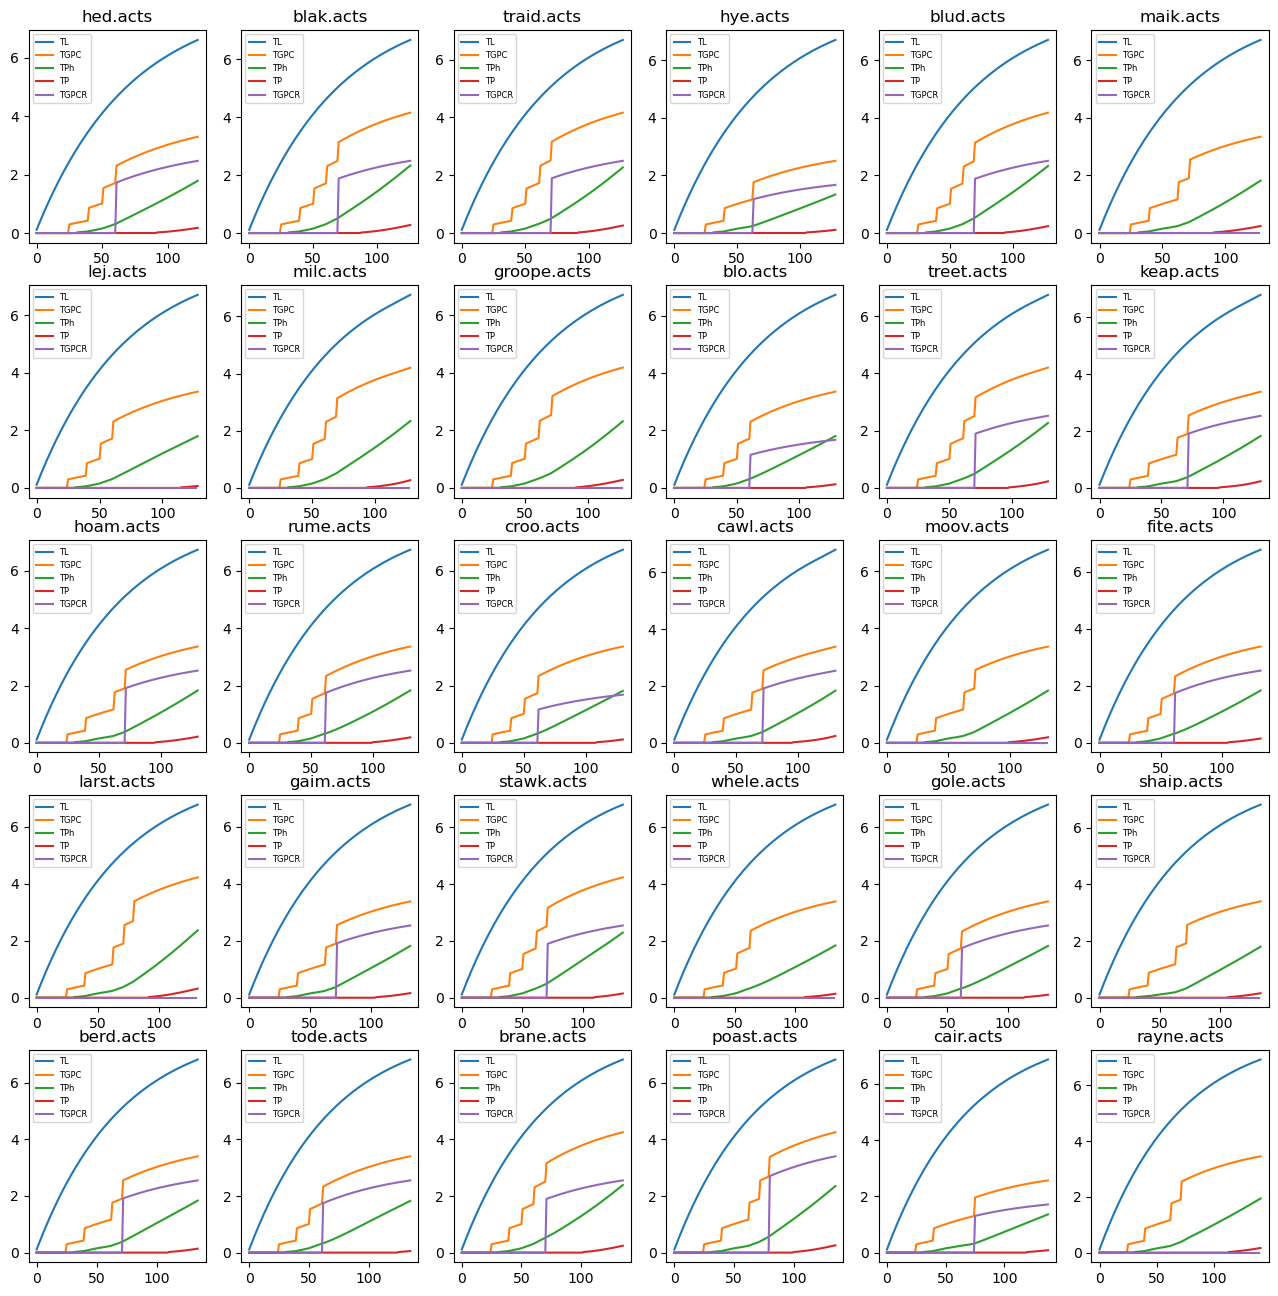

In [35]:
ph_activations.plot_multiple(nrows=5, figsize=(16, 16), 
                             order=list(np.argsort([ph_results[a[:-5]].cycles for a in ph_activations])))

#### Non pseudo-homophone - cycles order

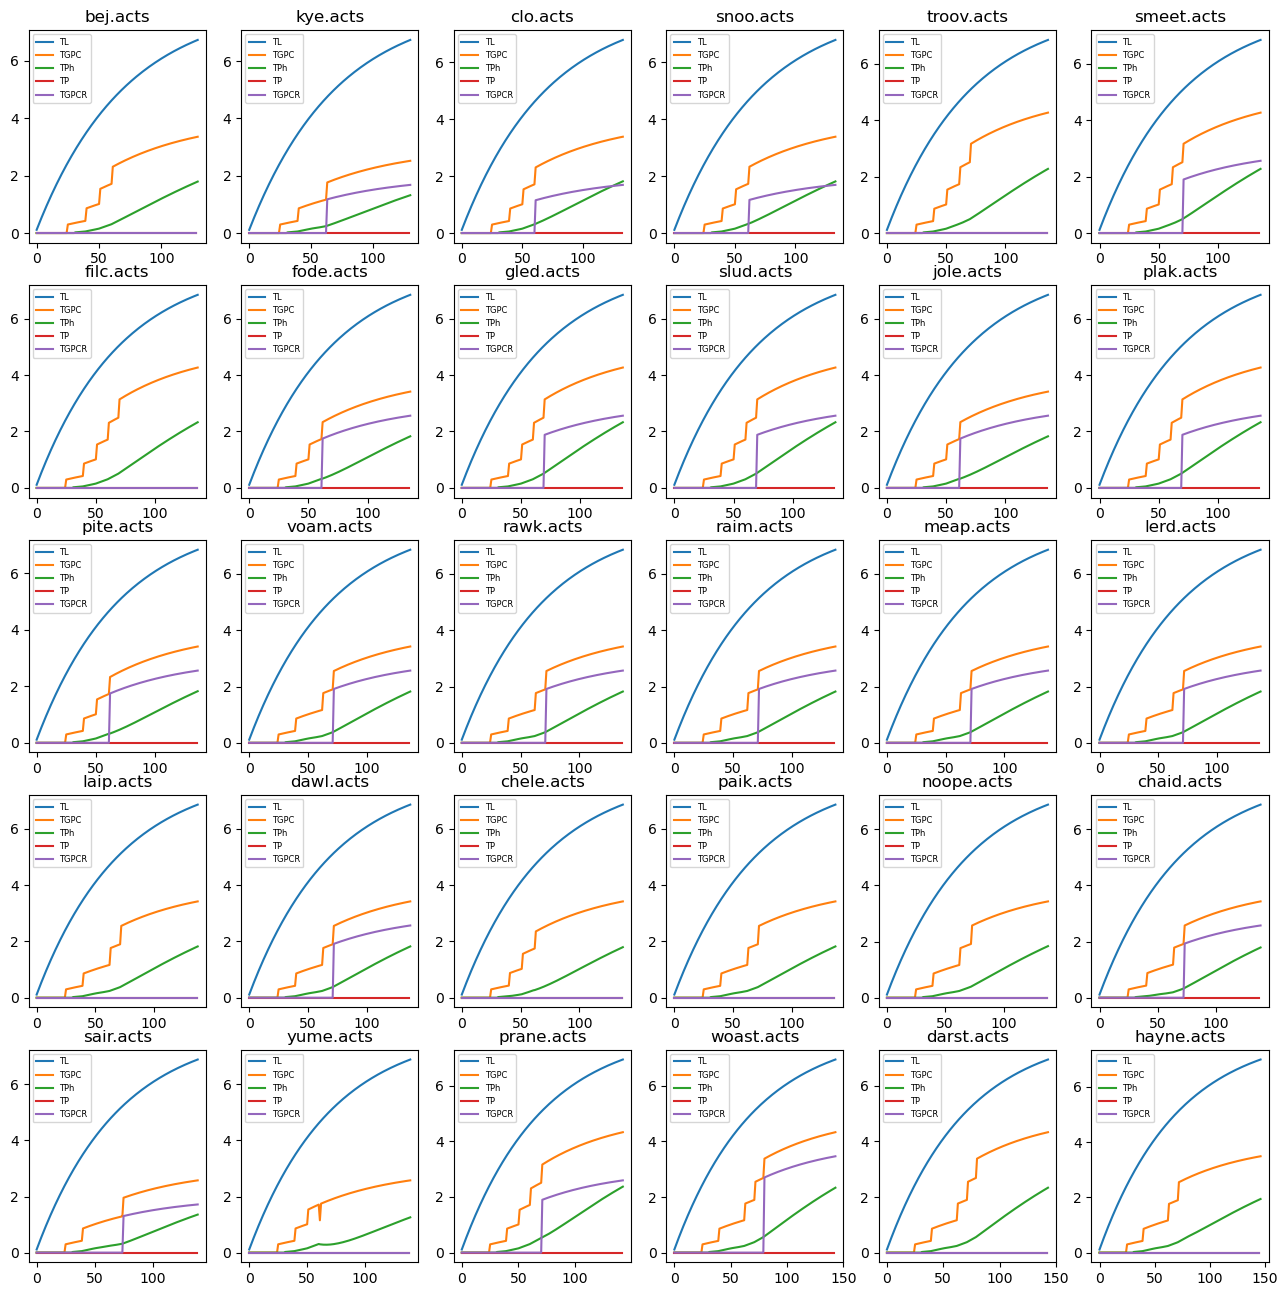

In [36]:
nph_activations.plot_multiple(nrows=5, figsize=(16, 16), 
                             order=list(np.argsort([nph_results[a[:-5]].cycles for a in nph_activations])))

Both sets exhibit the two patterns involving `TGPC` and `TGPCR` activations independently of the number of cycles, indicating that while we can distinguish two different phenomena in model activation, they do not play a significant role in determining the final number of cycles, i.e., how easy a word is to read.

Instead, what we can notice is a slight but consistent increase in `TP` activation during the final cycles of every pseudo-homophone word, which is totally absent in the non-pseudo-homophone set. This difference turns out to be crucial in the different reading dynamics of the two classes, which, as hypothesized, involve phonology in the lexical route.

## Exercise 3

### Instructions

A brain injured patient is diagnosed with Surface Dyslexia when se/he’s better at reading regular words (`regular.txt`) and nonwords(`nonwordsNonPseudohomophones.txt`), as compared to irregular words(`irregular.txt`; e.g., Patterson, Marshall and Coltheart, 1985). How would you simulate such a patient with the DRC? Is there only one way to do so? If not,describe two different damages to the system that would generate the impairment, and illustrate their (different) behaviour.

### DRC for Surface Dyslexia



Surface dyslexia is a condition that results in patients having greater difficulty reading irregular words compared to regular words or non-words. The condition impairs the patient's ability to perceive words as whole entities, and as a consequence inhibits the lexical route which work a word level for the lookup-table mapping. As a result, patients primarily need to rely on the grapheme-to-phoneme conversion (GPC) route, which operates at the letter level and applies phonetic rules. This route is effective for regular words that follow such rules or non-words where a real pronunciation doesn't exist and rules can be applied, but it is not effective for irregular words, which are prone to realy more on the lexical route that is now impaired.

### Reading words

Let's take a look to the words simulated in the experiment.

In [37]:
print_list(l=regular_words, title="Regular words")

Regular words
- buds
- canes
- coil
- curl
- grade
- lump
- lode
- pops
- rump
- sock
- sage
- suck
- sobs
- wade
- weed
- wick
- weld
- wilt
- woke
- wink
Tot: 20


In [38]:
print_list(l=nph_words, title="Non words")

Non words
- prane
- filc
- jole
- raim
- chele
- woast
- troov
- hayne
- chaid
- fode
- yume
- paik
- gled
- noope
- meap
- rawk
- plak
- voam
- slud
- pite
- clo
- smeet
- kye
- dawl
- laip
- darst
- bej
- lerd
- sair
- snoo
Tot: 30


In [39]:
print_list(l=irregular_words, title="Irregular words")

Irregular words
- bury
- caste
- comb
- grow
- glove
- lure
- lute
- pour
- ruse
- sew
- sans
- sues
- sown
- wand
- warn
- warp
- wasp
- wily
- wool
- worm
Tot: 20


### Default DRC

Let's begin by analyzing the behavior of the three sets using the default DRC settings.

In [40]:
regular_results   = drc.run(word=regular_file)
ph_results        = drc.run(word=ph_file)
irregular_results = drc.run(word=irregular_file)

Running: ./drc --nofiles -b regular.txt
Running: ./drc --nofiles -b nonwordPseudohomophone.txt
Running: ./drc --nofiles -b irregular.txt


Regular avg.          70
Irregular avg.        95
Pseudo homophone avg. 138


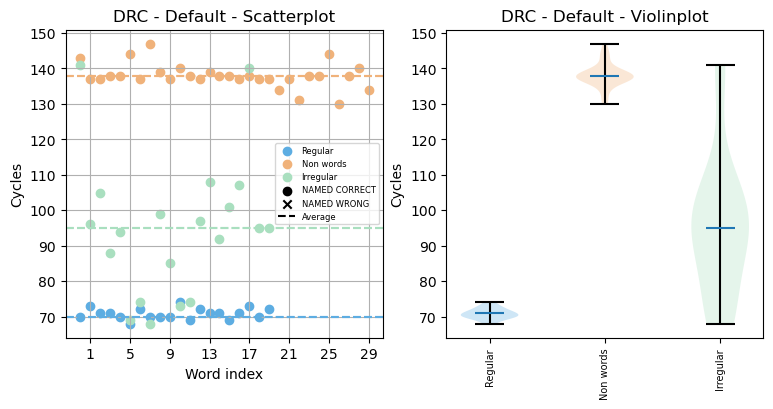

In [41]:
print(f"Regular avg.          {regular_results.avg_cycle}")
print(f"Irregular avg.        {irregular_results.avg_cycle}")
print(f"Pseudo homophone avg. {nph_results.avg_cycle}")

ResultSet.plot_cycles_comparison(
    results=[regular_results, nph_results, irregular_results],
    legends=["Regular", "Non words", "Irregular"],
    title="DRC - Default"
)


In the default network configuration, a  clear pattern emerges. Regular words are all concentrated around a mean of 70 cycles, with a contained and normally distributed pattern. Similarly, for non-words, there is a narrow distribution, but with a mean of cycles requiring approximately the double of time, at 140 cycles. Although the mean for irregular words falls roughly in between the two, around 95 cycles, the violin plot highlights the presence of highly variable points that exhibit the same behavior as non-words in one case or regular words in the other.
For the default networks it's easier to read regular words than irregular words, but it's also easier to read real words than non-words.

### Case 1

As a first experiment to simulate surface dyslexia, let's attempt to kill the lexical route by nullifying the strength of its connections relative to orthographic-to-letter and orthographic-to-phoneme processing, making the model only rely on the GPC route.

In [42]:
parameter_case1 = [
    (Parameter.OrthlexPhonlexExcitation, 0.001),
    (Parameter.OrthlexLetterExcitation, 0.001)
]

regular_results_case1   = drc.run(word=regular_file,   parameters=parameter_case1)
nph_results_case1       = drc.run(word=nph_file,       parameters=parameter_case1)
irregular_results_case1 = drc.run(word=irregular_file, parameters=parameter_case1)

Running: ./drc --nofiles -P OrthlexPhonlexExcitation 0.001 -P OrthlexLetterExcitation 0.001 -b regular.txt
Running: ./drc --nofiles -P OrthlexPhonlexExcitation 0.001 -P OrthlexLetterExcitation 0.001 -b nonwordPseudohomophone.txt
Running: ./drc --nofiles -P OrthlexPhonlexExcitation 0.001 -P OrthlexLetterExcitation 0.001 -b irregular.txt


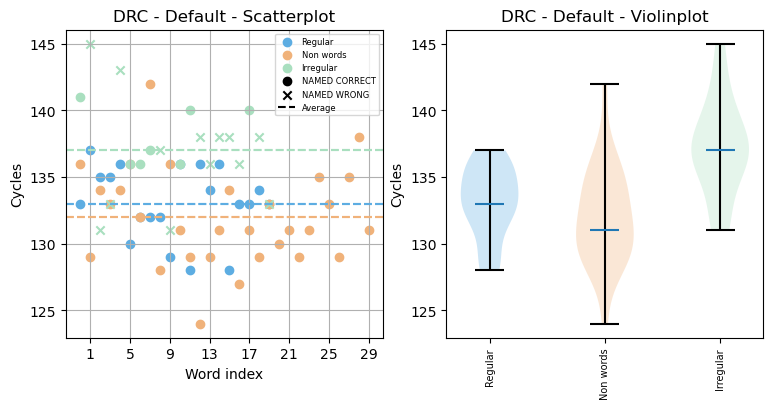

In [43]:
ResultSet.plot_cycles_comparison(
    results=[regular_results_case1, nph_results_case1, irregular_results_case1],
    legends=["Regular", "Non words", "Irregular"],
    title="DRC - Default"
)

The result obtained is as expected. Each word is now slower to read. Previously, the difference in cycles between the different sets of words was a few dozen cycles, but now all words fall within a more limited range, reducing the difference between sets. Overall, all words are read more slowly, which is understandable since they now rely solely on the slower non-lexical route. Non-words are now faster to read on average, followed by regular words, and irregular words are the slowest, mimicking the condition of a patient with surface dyslexia.

It's also important to note that some of the irregular words were pronounced incorrectly, suggesting that the conversion rules alone were not sufficient to provide the correct pronunciation when not combined with the stored ones derivable from the lexical root.

The fact that non-words transition from being the slowest to the fastest may be due to the slight advantage they gain from not having to manage conflicts with the weakened lexical route, as they do not have entries in the lookup table.

### Case 2

We can attempt to simulate the same phenomenon using a different approach by further disabling the lexical route deeper in the pipeline. This would allow the word to be processed as a whole entity but limit the ability to access the lookup table containing the pronunciation, effectively inhibiting the lexical route once again. Instead of enabling the network to process the word as a whole, we block the possibility of using it for pronunciation mapping, potentially leading to the same effect.

In [44]:
parameter_case2 =  [
    (Parameter.FeatureLetterInhibition, 0.001), 
]

regular_results_case2   = drc.run(word=regular_file,   parameters=parameter_case2)
nph_results_case2        = drc.run(word=ph_file,        parameters=parameter_case2)
irregular_results_case2 = drc.run(word=irregular_file, parameters=parameter_case2)

Running: ./drc --nofiles -P FeatureLetterInhibition 0.001 -b regular.txt
Running: ./drc --nofiles -P FeatureLetterInhibition 0.001 -b nonwordPseudohomophone.txt
Running: ./drc --nofiles -P FeatureLetterInhibition 0.001 -b irregular.txt


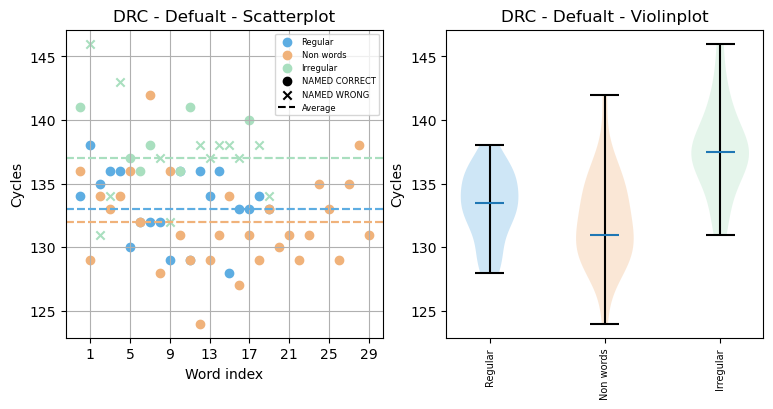

In [45]:
ResultSet.plot_cycles_comparison(
    results=[regular_results_case2, nph_results_case2, irregular_results_case2],
    legends=["Regular", "Non words", "Irregular"],
    title="DRC - Defualt"
)

The results correspond almost identically to those of the previous experiment, indicating that alternating between two different types of parameters, one acting at the level of word identification as a whole, and the other affecting access to the lookup table for word-pronunciation, produces practically the same effect of rendering the information derived from the lexical route unavailable. Consequently, the reading speed of words relies solely on their interaction with the GPC route, which we know favors regular words and non-words over irregular words as they better fit the conversion between graphemes and phonemes.